In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


%matplotlib inline

In [33]:
df = pd.read_csv('loans_ts.csv')
df.head()

Unnamed: 0  credit.policy           purpose  int.rate  installment  \
0        8150              0    small_business    0.1299       505.34   
1        7086              1       credit_card    0.1062       618.64   
2        9374              0         all_other    0.1531       139.27   
3        7439              1  home_improvement    0.1570       280.09   
4        5345              1       credit_card    0.1531       870.39   

   log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0       11.407565  10.24   672        2250.000000       4162        68.4   
1       11.289782  13.29   737        5070.000000      14462        36.1   
2       10.555813   8.34   667        3810.041667       1151         9.8   
3       10.874266   7.36   662        4770.000000      10973        87.8   
4       11.727372  16.65   707       10590.000000      40413        85.6   

   inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0              14            0        1               1  
1               1            0        0               0  
2               6            0        0               0  
3               0            1        0               1  
4               0            0        0               0

In [34]:
df.shape

(1000, 15)

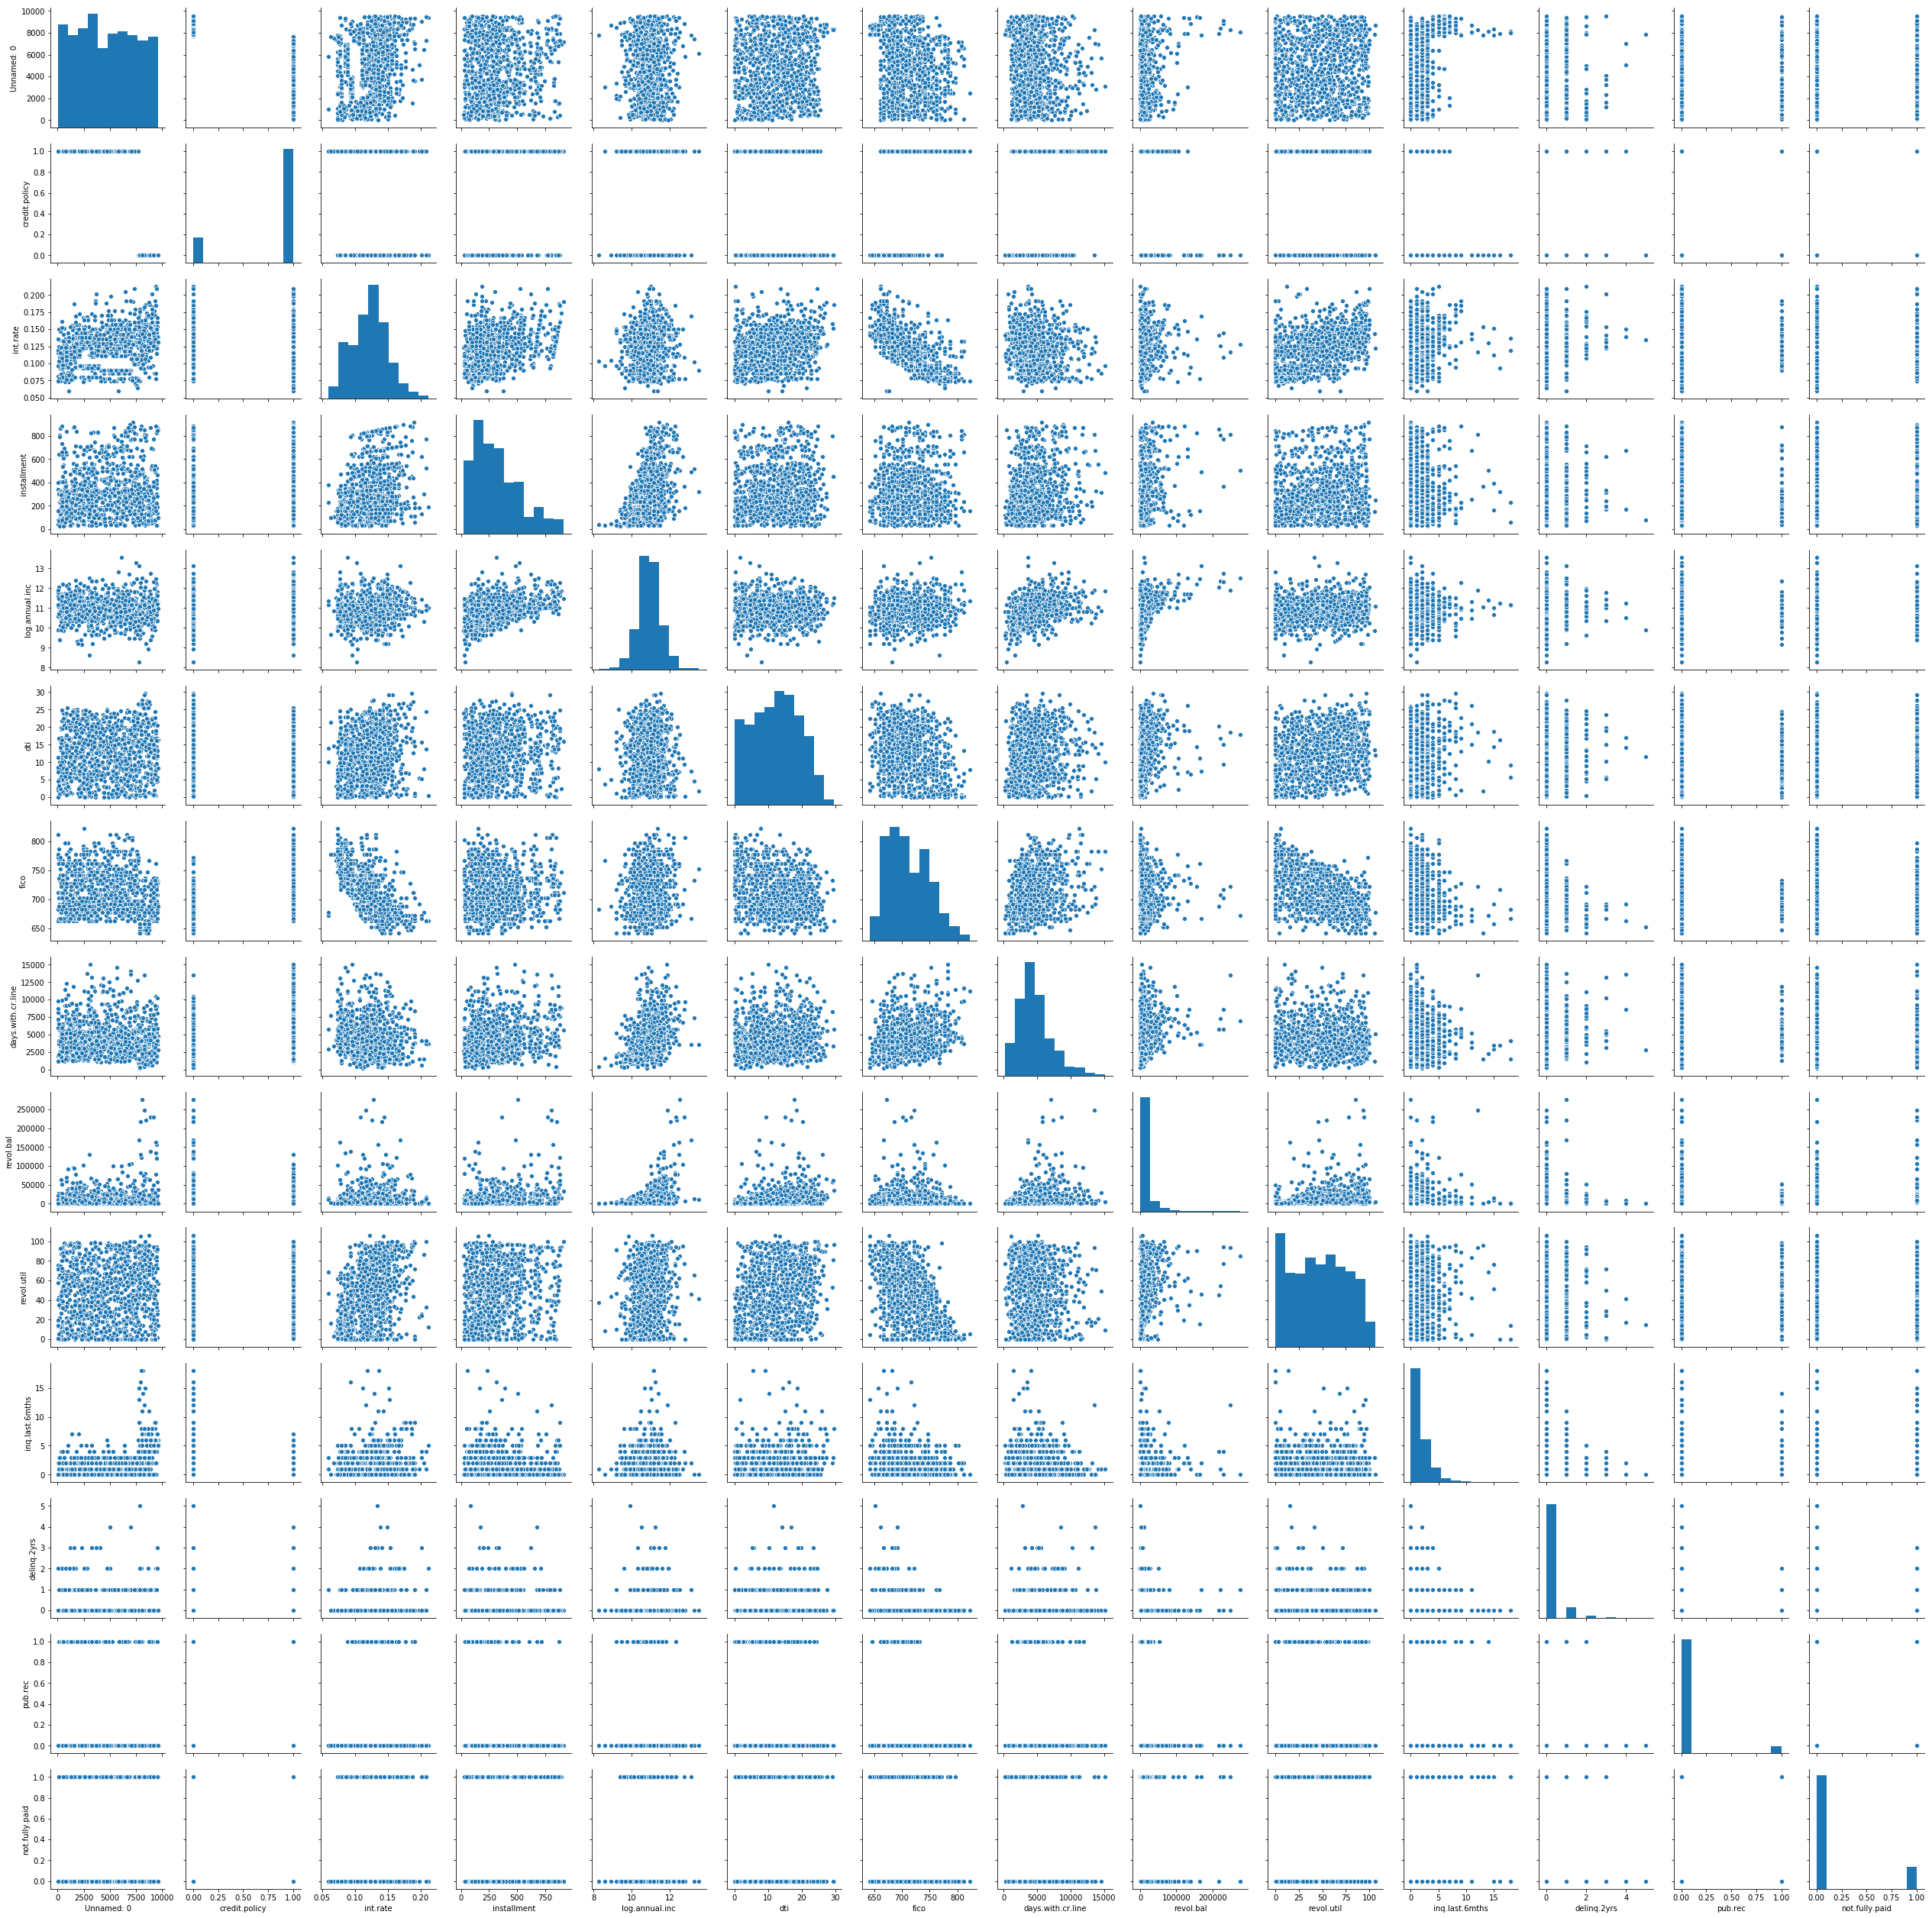

In [35]:
sns.pairplot(df)

In [36]:
print(df.dtypes)

Unnamed: 0             int64
credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [37]:
df_mod=pd.get_dummies(df)

In [38]:
print(df_mod.dtypes)

Unnamed: 0                      int64
credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_all_other               uint8
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
purpose_small_business          uint8
dtype: object


In [39]:
df_mod.head()

Unnamed: 0  credit.policy  int.rate  installment  log.annual.inc    dti  \
0        8150              0    0.1299       505.34       11.407565  10.24   
1        7086              1    0.1062       618.64       11.289782  13.29   
2        9374              0    0.1531       139.27       10.555813   8.34   
3        7439              1    0.1570       280.09       10.874266   7.36   
4        5345              1    0.1531       870.39       11.727372  16.65   

   fico  days.with.cr.line  revol.bal  revol.util  ...  delinq.2yrs  pub.rec  \
0   672        2250.000000       4162        68.4  ...            0        1   
1   737        5070.000000      14462        36.1  ...            0        0   
2   667        3810.041667       1151         9.8  ...            0        0   
3   662        4770.000000      10973        87.8  ...            1        0   
4   707       10590.000000      40413        85.6  ...            0        0   

   not.fully.paid  purpose_all_other  purpose_credit_card  \
0               1                  0                    0   
1               0                  0                    1   
2               0                  1                    0   
3               1                  0                    0   
4               0                  0                    1   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           0                    0                         0   
1                           0                    0                         0   
2                           0                    0                         0   
3                           0                    0                         1   
4                           0                    0                         0   

   purpose_major_purchase  purpose_small_business  
0                       0                       1  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0  

[5 rows x 21 columns]

In [40]:
df_mod.shape

(1000, 21)

In [42]:
# X_data, y_data division
from sklearn.model_selection import train_test_split
array = df_mod.values
X = array[:,0:20]
Y = array[:,20]

In [43]:
# train data, test data division

validation_size = 0.20
seed = 15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [44]:
# Compare Algorithms - model selection

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [45]:
import warnings
warnings.simplefilter('ignore')

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB'

In [46]:
# Evaluate Algorithms
# Test options and evaluation metric

num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [47]:
# cross validation을 통해 optimal model selection

results = []
names = []
for name, model in models:
    
    kf = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kf, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
print(results)

LR: 0.957500 (0.030721)
LDA: 0.925000 (0.032113)
KNN: 0.923750 (0.028201)
CART: 0.937500 (0.036228)
NB: 0.905000 (0.041155)
RF: 0.932500 (0.033634)
[array([0.9125, 0.9375, 1.    , 0.95  , 0.9375, 1.    , 0.9625, 0.95  ,
       0.925 , 1.    ]), array([0.9   , 0.925 , 0.9125, 0.9375, 0.8875, 0.9125, 0.95  , 0.9375,
       0.8875, 1.    ]), array([0.9125, 0.9125, 0.95  , 0.9375, 0.9   , 0.9125, 0.9   , 0.9375,
       0.8875, 0.9875]), array([0.85  , 0.925 , 0.9125, 0.9625, 0.9375, 0.9625, 0.95  , 0.9875,
       0.925 , 0.9625]), array([0.925 , 0.8875, 0.9375, 0.9375, 0.8125, 0.925 , 0.9   , 0.9   ,
       0.8625, 0.9625]), array([0.9   , 0.9125, 0.9625, 0.95  , 0.9125, 0.9   , 0.95  , 0.95  ,
       0.8875, 1.    ])]


In [48]:
# pipeline을 활용해서 scaling하고 optimal model selection

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))

In [28]:
pipelines

[('ScaledLR', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False))])),
 ('ScaledLDA', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001))])),
 ('ScaledKNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform'))])),
 ('ScaledCART', Pi

In [49]:
results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits = num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 1.000000 (0.000000)
ScaledLDA: 0.925000 (0.032113)
ScaledKNN: 0.958750 (0.019405)
ScaledCART: 0.945000 (0.028614)
ScaledNB: 1.000000 (0.000000)
ScaledRF: 0.931250 (0.033190)


In [50]:
# ensemble 과 grid search를 활용한 model selection

n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ['sqrt','log2', None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold(n_splits = num_folds, random_state= seed)
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.953750 using {'max_features': None, 'n_estimators': 15}


In [31]:
# final test score - test data

best_RF = RandomForestClassifier(max_features='sqrt', n_estimators=20)
best_RF.fit(X_train, Y_train)
best_RF.feature_importances_

array([0.00743809, 0.12534221, 0.12422467, 0.08663421, 0.08826318,
       0.07533604, 0.06513954, 0.08292469, 0.0698746 , 0.05377213,
       0.006142  , 0.00362255, 0.01653067, 0.04282571, 0.03570874,
       0.07229352, 0.00486761, 0.03163354, 0.00742627])